In [1]:
from joblib import load
# var to set---- Jahr hier und unten in .joblib müssen übereinstimmen!!!
prediction_year = '2021' # 2019, 2020, 2021
#------
# FinalTask2_NN_2021_Hyperparamctr2204all
# FinalTask2_NN_2021_HyperparamctrallIndividual
# var to set----
vars = load('FinalTask2_NN_2021_HyperparamctrallIndividual.joblib')
#-----
NNet_prediction_list, country_list, pred_year_string, seed, zero_fatalities_country_list = vars

# File import
## Prediction

In [2]:
import os
from joblib import load
import numpy as np

user_dir = os.path.expanduser('~')
file_path = os.path.join(user_dir, 'iCloudDrive\\Joblib BA\\final baseline', 'FinalTask2_baseline_predct_hurdleWmax24.joblib')
loaded_vars_baseline = load(file_path)

task2_baseline_list = loaded_vars_baseline[0] # crps averages for all 4 datasets
w_minimization_list = loaded_vars_baseline[1] # contains the minimal w's for the different baselines for each year and country
baseline_prediction_list = loaded_vars_baseline[2] # predictions with the minimal w's for each dataset and country
baseline1_average_crps = loaded_vars_baseline[3] # mean CRPS from the baseline_prediction_list
baseline2_average_crps = loaded_vars_baseline[4] # ""
baseline3_average_crps = loaded_vars_baseline[5]
baseline4_average_crps = loaded_vars_baseline[6]

print('Overall CRPS, max. w = 24')
print('baseline 1: ' + str(np.round(baseline1_average_crps, decimals = 4)))
print('baseline 2: ' + str(np.round(baseline2_average_crps, decimals = 4)))
print('baseline 3: ' + str(np.round(baseline3_average_crps, decimals = 4)))
print('baseline 4: ' + str(np.round(baseline4_average_crps, decimals = 4)))

Overall CRPS, max. w = 24
baseline 1: 16.1644
baseline 2: 16.3591
baseline 3: 16.2584
baseline 4: 16.2204


In [3]:
country_list
zero_fatalities_country_list

[1,
 2,
 5,
 6,
 7,
 8,
 9,
 10,
 12,
 14,
 18,
 19,
 20,
 21,
 22,
 23,
 25,
 26,
 27,
 29,
 30,
 32,
 34,
 35,
 36,
 37,
 38,
 40,
 42,
 45,
 54,
 58,
 63,
 64,
 66,
 74,
 76,
 77,
 80,
 81,
 85,
 87,
 89,
 90,
 93,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 107,
 109,
 110,
 111,
 112,
 113,
 114,
 116,
 118,
 119,
 122,
 127,
 130,
 140,
 142,
 143,
 144,
 146,
 151,
 152,
 153,
 154,
 157,
 158,
 161,
 163,
 164,
 168,
 169,
 171,
 172,
 173,
 174,
 176,
 178,
 181,
 182,
 183,
 198,
 206,
 231,
 232,
 233]

In [4]:
w_mean_list = []
w_var_list = []
for year in range(4):
    w_average_list = []
    data = w_minimization_list[year]['minWData'][0]
    
    w_mean_list.append(data.iloc[0,0])

In [5]:
print(round(np.mean(w_mean_list), 2))
print(round(np.std(w_mean_list),2))

22.5
2.06


In [6]:
w_mean_list = []
w_var_list = []
for year in range(4):
    w_average_list = []
    data = w_minimization_list[year]['minWData'][1]
    for i in range(len(data)):
        if data.iloc[i,0] not in zero_fatalities_country_list:
            w_average_list.append(data.iloc[i,1])

    w_mean_list.append(round(np.mean(w_average_list), 2))
    w_var_list.append(round(np.var(w_average_list), 2))

In [7]:
print(round(np.mean(w_mean_list), 2))
print(round(np.std(w_var_list),2))

9.84
1.68


In [19]:
df = w_minimization_list[3]['minWData'][1]
mask = df['country_id'].isin(zero_fatalities_country_list)

# Neuen DataFrame erstellen, der nur die Zeilen mit erlaubten country_id Werten enthält
filtered_df = df[-mask]

In [20]:
filtered_df

,country_id,w,CRPS
2,3,2,0.000000
3,4,2,0.000000
10,11,10,0.065173
12,13,21,0.210281
14,16,2,0.000000
15,17,2,0.000000
22,24,2,0.000000
26,28,24,4.973976
29,31,2,0.000000
31,33,2,0.000000


In [18]:
import pandas as pd
pd.options.display.max_rows = 1000

w_minimization_list[3]['minWData'][1]

,country_id,w,CRPS
0,1,2,0.000000
1,2,2,0.000000
2,3,2,0.000000
3,4,2,0.000000
4,5,2,0.000000
5,6,2,0.000000
6,7,2,0.000000
7,8,2,0.000000
8,9,2,0.000000
9,10,2,0.000000


In [8]:
w_mean_list = []
w_var_list = []
for year in range(4):
    w_average_list = []
    data = w_minimization_list[year]['minWData'][2]
    
    w_mean_list.append(round(np.mean(data.iloc[:,1]), 2))
    w_var_list.append(round(np.var(data.iloc[:,1]), 2))

In [9]:
print(round(np.mean(w_mean_list), 2))
print(round(np.std(w_var_list),2))

23.1
27.82


In [10]:
w_mean_list = []
w_var_list = []
for year in range(4):
    w_average_list = []
    data = w_minimization_list[year]['minWData'][3]
    for i in range(len(data)):
        if data[i].iloc[0,0] not in zero_fatalities_country_list:
            w_average_list.append(np.mean(data[i].iloc[:,2]))

    w_mean_list.append(round(np.mean(w_average_list), 2))
    w_var_list.append(round(np.var(w_average_list), 2))

In [11]:
print(round(np.mean(w_mean_list), 2))
print(round(np.std(w_var_list),2))

8.88
3.91


In [12]:
w_minimization_list[3]['minWData'][0]

,w,CRPS
0,19,11.21078


In [13]:
#          baseline method|country                  s-3 (only index 0 for baseline 1 and 2 due to the non minimizing s)
#baseline_prediction_list[1][0]#['prediction']['2018']

## Estimation

In [14]:
user_dir = os.path.expanduser('~')
file_path = os.path.join(user_dir, 'iCloudDrive\Joblib BA', 'task2_baseline_estim_hurdleWmax3ctrs.joblib')
loaded_vars_baseline = load(file_path)

country_list = loaded_vars_baseline[0] # list of all countries
baseline_estimate_list = loaded_vars_baseline[1] # all estimation windows for each country and w

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Tobias\\iCloudDrive\\Joblib BA\\task2_baseline_estim_hurdleWmax3ctrs.joblib'

In [ ]:
#                     w                        country         rollingWindow|predicton/actuals
#baseline_estimate_list[0]['country_predict_list'][18]['predictionWindowsN'][0][0]

### Check if nan/inf/-inf is in one of the fatality estimates

In [ ]:
from tqdm import tqdm
def contains_nan(lst):
    # Konvertiere die Liste in ein NumPy-Array
    arr = np.array(lst)

    return np.isnan(arr).any()

def contains_negative_infinity(lst):
    # Konvertiere die Liste in ein NumPy-Array
    arr = np.array(lst)
    
    return np.isneginf(arr).any()

def contains_infinity(lst):
    # Konvertiere die Liste in ein NumPy-Array
    arr = np.array(lst)
    
    return np.isinf(arr).any()

for countrIndex in tqdm(range(len(baseline_estimate_list[1]['country_predict_list']))):
    for wIndex in range(len(baseline_estimate_list)):
        for rollingWindowIndex in range(len(baseline_estimate_list[wIndex]['country_predict_list'][countrIndex]['predictionWindowsN'])):
            rolling_window_fatalities = baseline_estimate_list[wIndex]['country_predict_list'][countrIndex]['predictionWindowsN'][rollingWindowIndex][0]['fatalities']
            nan = contains_nan(rolling_window_fatalities)
            neginf = contains_negative_infinity(rolling_window_fatalities)
            inf = contains_infinity(rolling_window_fatalities)
            
            if nan:
                print('nan')
            if neginf:
                print('-inf')
            if inf:
                print('inf')
            
            if nan or neginf or inf:
                print('country index ' + str(countrIndex))
                print('w index ' + str(wIndex))
                print('rolling window ' + str(rollingWindowIndex))

  0%|          | 0/191 [00:00<?, ?it/s]

100%|██████████| 191/191 [00:06<00:00, 27.97it/s]


In [ ]:
#                     w                        country         rollingWindow|predicton/actuals
#baseline_estimate_list[0]['country_predict_list'][6]['predictionWindowsN'][0][0]

In [6]:
import os
from joblib import load
import numpy as np

#randomctr220wRand_200s8_30valid_2021  !!

user_dir = os.path.expanduser('~')
file_path = os.path.join(user_dir, 'iCloudDrive\\Joblib BA\\final hyperparam', 'FinalrandomctrAllwRand12_50s8_30valid_2021.joblib')
loaded_vars_rndHyperparam = load(file_path)

country_selected_hyperparam_list, prediction_year, country_list, zero_fatalities_country_list = loaded_vars_rndHyperparam

In [9]:
len(country_list)

96

In [18]:
country_list.index(133)

54

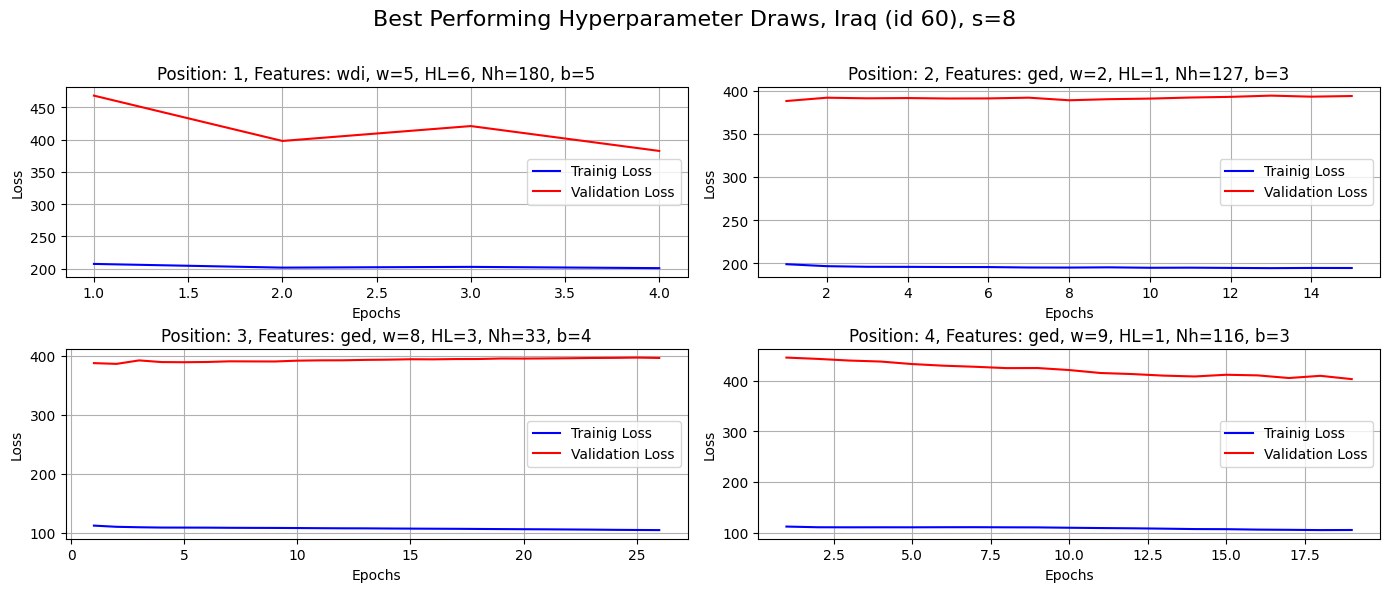

In [39]:
import numpy as np
import matplotlib.pyplot as plt

country_to_plot = 60
country_index = country_list.index(country_to_plot)



# Erstelle eine Figur mit 1 Zeile und 3 Spalten für die beiden Plots nebeneinander und kleiner
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 6))



i = 0 #zeile
j = 0 #spalte


sorted_best_runs = country_selected_hyperparam_list[country_index]['hyperparams']

title_string = 'Best Performing Hyperparameter Draws, Iraq (id ' + str(country_to_plot) + '), s=8'

for k in range(0, 4):

    best_run = sorted_best_runs[k]

    loss = best_run['loss']
    val_loss = best_run['val_loss']
    epochs = best_run['epochs']
        
    axes[i][j].plot(epochs, loss, color='blue', label='Trainig Loss')
    axes[i][j].plot(epochs, val_loss, color='red', label='Validation Loss')
    axes[i][j].set_title('Position: ' + str(k+1) + ', Features: ' + str(best_run['random_params']['featureSubset']) + ', w=' + str(best_run['random_params']['w']) + ', HL=' + str(best_run['random_params']['numbHiddenL']) + ', Nh=' + str(int(best_run['random_params']['numbNeurons'])) + ', b=' + str(best_run['random_params']['batch_size']))
    axes[i][j].set_xlabel('Epochs')
    axes[i][j].set_ylabel('Loss')
    axes[i][j].legend()
    axes[i][j].grid(True)
    if j == 1:
        i += 1
        j = 0
    else:  
        j += 1

plt.tight_layout()  # Optimiere den Abstand zwischen den Subplots
plt.subplots_adjust(top=0.85)  # Mache Platz für den Haupttitel außerhalb des Plotbereichs
fig.suptitle(title_string, y=0.98, fontsize=16)
plt.show()

In [22]:
best_run['random_params']

{'wmax': 1,
 'numbHiddenL': 6,
 'relNeurons': 0.35,
 'lr': 0.034,
 'featureSubset': 'conflict_history',
 'batch_size': 6,
 'dropoutrate': 0,
 'epochs': 37,
 'numbNeurons': 87.0,
 'w': 1}